In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score

In [2]:
#import data
glass = pd.read_csv('glass.csv')
glass.head(10)

RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
5  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
6  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
7  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
8  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
9  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1

### Data Preprocessing

In [3]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
X = glass.iloc[:,0:-1]
Y = glass.iloc[:,-1]

In [6]:
X.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0

In [7]:
#split the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 40)

## KNN Model Fit

In [8]:
model = KNeighborsClassifier(n_neighbors=5)
knn = model.fit(x_train, y_train)
results = cross_val_score(model, x_train, y_train, cv=6)

In [9]:
print(results.mean())

0.6373152709359605


In [10]:
#predict y variable from test data
y_pred = model.predict(x_test)

In [11]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.58      0.85      0.69        13
           2       0.74      0.82      0.78        17
           3       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         2
           7       1.00      0.50      0.67         4

    accuracy                           0.70        43
   macro avg       0.55      0.53      0.52        43
weighted avg       0.63      0.70      0.65        43



C:\Users\Debanjali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This model cant predict the class labels of class 3 and 6 at all. 

### Improving the model by optimising the value of k

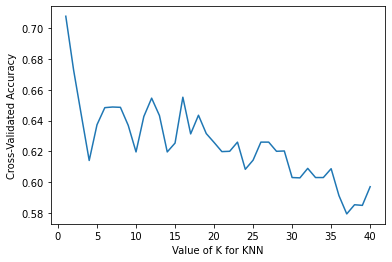

In [14]:
#finding the optimal k value and its accuracy

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=6)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [15]:
k = pd.DataFrame({'k_scores':k_scores})
k=k.sort_values('k_scores',ascending = False)
k.head(10)

k_scores
0   0.707718
1   0.672824
15  0.655172
11  0.654557
6   0.648810
7   0.648604
5   0.648399
17  0.643473
2   0.643268
12  0.643268

From the above table we can say that k=0 has the max accuracy, but taking k=0 means theres no neighbor at all. Instead if we take k = 1 , we will get the accuracy of 67.3 %.

### Building a new model with k=1

In [16]:
model_new = KNeighborsClassifier(n_neighbors=1)
knn = model_new.fit(x_train, y_train)
results_new = cross_val_score(model_new, x_train, y_train, cv=6)

In [17]:
print(results_new.mean())

0.7077175697865353


In [18]:
#Comparing the actual and predicted results

y_pred_new = model_new.predict(x_test)
test_results_df = pd.DataFrame({'actual':y_test,'predicted':y_pred_new})
test_results_df.head(10)

actual  predicted
140       2          2
62        1          1
177       6          6
166       5          5
175       5          5
35        1          1
77        2          2
5         1          2
194       7          7
59        1          2

### Classification Report¶

In [19]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           1       0.59      0.77      0.67        13
           2       0.79      0.65      0.71        17
           3       0.67      0.50      0.57         4
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      0.50      0.67         4

    accuracy                           0.70        43
   macro avg       0.74      0.74      0.71        43
weighted avg       0.73      0.70      0.69        43



## Conclusion

#### From the classification report and the test-results dataframe we can see that our model predicts perfectly for the class 5 and 6 . The model overall performs well in classifying the labels,with an average accuracy of 70 %.